# Tensorflow playground with code

Remember when we played witht the tensorflow playground? Well let's do a quick exercise in order to recreate these examples but with code!

* import `make_circles` from `sklearn.datasets` and create an object data containing circle data of 1000 observations, with some noise and a factor of your choice.



In [1]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)

* Create an object `x` and `y` containing the training and target variable respectively.

In [2]:
X

array([[-0.22183154,  0.16895499],
       [ 0.1170371 , -0.54462458],
       [-0.3712472 , -0.8917971 ],
       ...,
       [-1.14235598, -0.03598843],
       [-0.32036737,  1.09794999],
       [-0.59668625, -0.24426629]])

* Visualize the data

In [3]:
import plotly.express as ex
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

ex.scatter(x=X[:, 0], y=X[:, 1], color=y, color_continuous_scale=color_chart[:2])

* Split them in train and validation set with sklearn

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y)

* Form two batch datasets, one for training data, one for validation data

In [60]:
import tensorflow as tf

train_batch = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(8)
val_batch = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(8)

* Create a neural network model in order to make predictions on this dataset, try and make it as simple as possible.

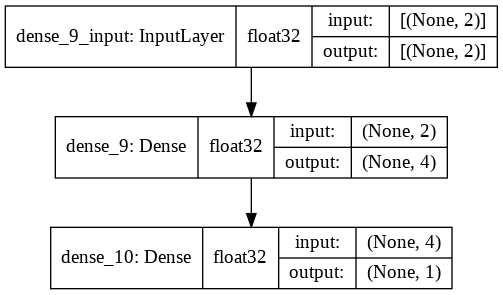

In [61]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(4, activation="relu", input_shape=[2]),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

* Compile the model using Adam and a loss function and metric that suit our problem.

In [62]:
# Compile your model 
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=tf.losses.binary_crossentropy,
    metrics=['accuracy']
)

* Train the model over 100 epochs

In [63]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.7260 - accuracy: 0.4982 - val_loss: 0.6695 - val_accuracy: 0.4680
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5473 - val_loss: 0.6339 - val_accuracy: 0.6360
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6879 - val_loss: 0.5813 - val_accuracy: 0.6600
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7323 - val_loss: 0.5230 - val_accuracy: 0.7520
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8184 - val_loss: 0.4187 - val_accuracy: 0.9560
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9317 - val_loss: 0.3336 - val_accuracy: 0.9880
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.9760 - val_loss: 0.2574 - val_accuracy: 0.9760
Epoch 8/100
9

* Plot the evolution of the train loss and the validation loss and the evolution of the train metric and the validation metric.

In [64]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_scatter(y=history.history["loss"], mode='lines', name='Training loss')
fig.add_scatter(y=history.history["val_loss"], mode='lines', name='Validation loss')

In [65]:
import plotly.express as px
fig = go.Figure()
fig.add_scatter(y=history.history["accuracy"], mode='lines', name='Training accuracy')
fig.add_scatter(y=history.history["val_accuracy"], mode='lines', name='Validation accuracy')

* Did the model overfit ?

* Can you try and plot the decision function of the model in the data space? Like we saw in the tensorflow playground? You can get inspiration <a href="https://plotly.com/python/knn-classification/"> here </a>

In [67]:
import numpy as np
from plotly import express as px

x1_example = np.linspace(-2, 2, 100)
x2_example = np.linspace(-2, 2, 100)

x1, x2 = np.meshgrid(x1_example, x2_example)

example = np.array([[xx1, xx2] for xx1, xx2 in zip(x1.reshape(-1), x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100, 100])

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y, color_continuous_scale=color_chart[:2])

fig.add_trace(
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2], color_chart[-1]]
    )
)

* Use the following code to produce some spiral data:

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 1000
theta = np.sqrt(np.random.rand(N)) * 4 * np.pi

r_a = 2 * theta + np.pi
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N, 2)
x_a = x_a / np.abs(x_a).max()

r_b = -2 * theta - np.pi
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N, 2)
x_b = x_b / np.abs(x_b).max()

res_a = np.append(x_a, np.zeros((N, 1)), axis=1)
res_b = np.append(x_b, np.ones((N, 1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

fig = go.Figure(
    data=[
          go.Scatter(
              x=res[:, 0],
              y=res[:, 1],
              mode="markers",
              marker={
                  "color": res[:, 2],
                  "colorscale": color_chart[0:2]
              }
          )
    ]
)
fig.show()

data = res[:, 0:2]
target = res[:, -1]

* Split into train and validation set

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, target)

* Form a train and validation batch dataset

In [73]:
train_batch = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(8)
val_batch = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(8)

In [47]:
next(iter(train_batch))

(<tf.Tensor: shape=(8, 2), dtype=float64, numpy=
 array([[-0.87636982,  0.16659098],
        [-0.53377083,  0.7011807 ],
        [-0.73678179,  0.48640101],
        [ 0.49750551,  0.23908472],
        [-0.29109745, -0.12894989],
        [ 0.40947011, -0.76928894],
        [ 0.03741958,  0.6262608 ],
        [ 0.27767418,  0.10442498]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([1., 1., 1., 0., 0., 0., 0., 1.])>)

* Create a neural network model that can acheive good predictions on the train set (for now we do not care about overfitting)

In [49]:
model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, "relu", input_shape=[2]),
            tf.keras.layers.Dense(32, "relu"),
            tf.keras.layers.Dense(1, "sigmoid"),
])

* Compile the model with the right loss and metric and Adam optimizer

In [50]:
# Compile your model 
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=tf.losses.binary_crossentropy,
    metrics=['accuracy']
)

* Train the model over 100 epochs

In [51]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.6244 - val_loss: 0.6038 - val_accuracy: 0.6640
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.6638 - val_loss: 0.5257 - val_accuracy: 0.6360
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.6658 - val_loss: 0.4438 - val_accuracy: 0.6560
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.6902 - val_loss: 0.4262 - val_accuracy: 0.6700
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.6743 - val_loss: 0.3817 - val_accuracy: 0.7240
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.7417 - val_loss: 0.3515 - val_accuracy: 0.8040
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7377 - val_loss: 0.3154 - val_accuracy: 0.8220

* Is the model overfitting? Use visualization

In [52]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_scatter(y=history.history["loss"], mode='lines', name='Training loss')
fig.add_scatter(y=history.history["val_loss"], mode='lines', name='Validation loss')

* Visualize the decision boundary, would you say the model could benefit from some regularization?

In [57]:
import numpy as np
from plotly import express as px

x1_example = np.linspace(-1, 1, 100)
x2_example = np.linspace(-1, 1, 100)

x1, x2 = np.meshgrid(x1_example, x2_example)

example = np.array([[xx1, xx2] for xx1, xx2 in zip(x1.reshape(-1), x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100, 100])

fig = px.scatter(x=data[:, 0], y=data[:, 1], color=target, color_continuous_scale=color_chart[:2])

fig.add_trace(
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
        )
    )

* Create a new model and add regularization with `kernel_regularizer` of `Dense` layer to each layer, train it and visualize the decision boundary

In [74]:
from tensorflow.keras.regularizers import L2
l2 = L2(0.0001)

model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, "relu", input_shape=[2], kernel_regularizer=l2),
            tf.keras.layers.Dense(32, "relu", kernel_regularizer=l2),
            tf.keras.layers.Dense(1, "sigmoid", kernel_regularizer=l2),
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=tf.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [75]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.6714 - accuracy: 0.5740 - val_loss: 0.6356 - val_accuracy: 0.6420
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6264 - val_loss: 0.5406 - val_accuracy: 0.6620
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.6785 - val_loss: 0.4962 - val_accuracy: 0.7160
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7046 - val_loss: 0.4507 - val_accuracy: 0.7120
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7639 - val_loss: 0.4170 - val_accuracy: 0.7980
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.7984 - val_loss: 0.3312 - val_accuracy: 0.8360
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8350 - val_loss: 0.3036 - val_accuracy: 0.8380

In [76]:
import numpy as np
from plotly import express as px

x1_example = np.linspace(-1, 1, 100)
x2_example = np.linspace(-1, 1, 100)

x1, x2 = np.meshgrid(x1_example, x2_example)

example = np.array([[xx1, xx2] for xx1, xx2 in zip(x1.reshape(-1), x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100, 100])

fig = px.scatter(x=data[:, 0], y=data[:, 1], color=target, color_continuous_scale=color_chart[:2])

fig.add_trace(
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
        )
    )